In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
df_train = pd.read_csv('train_users_2.csv/train_users_2.csv')
df_test = pd.read_csv('test_users.csv/test_users.csv')

In [43]:
labels = df_train.country_destination.values
id_test = df_train.id

df_train.drop(['country_destination'],axis = 1)

df_all = pd.concat((df_train,df_test),axis = 0 ,ignore_index=True)

In [27]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [31]:
for col in df_all.columns:
    
    check = df_all[col].isnull().sum()
    if check !=0 :
        print(col + " has {} null values".format(check))

date_first_booking has 186639 null values
age has 116866 null values
first_affiliate_tracked has 6085 null values
country_destination has 62096 null values


In [44]:
df_all.drop(['id','date_first_booking'],axis = 1,inplace = True)

In [35]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     275547 non-null  object 
 1   timestamp_first_active   275547 non-null  int64  
 2   gender                   275547 non-null  object 
 3   age                      158681 non-null  float64
 4   signup_method            275547 non-null  object 
 5   signup_flow              275547 non-null  int64  
 6   language                 275547 non-null  object 
 7   affiliate_channel        275547 non-null  object 
 8   affiliate_provider       275547 non-null  object 
 9   first_affiliate_tracked  269462 non-null  object 
 10  signup_app               275547 non-null  object 
 11  first_device_type        275547 non-null  object 
 12  first_browser            275547 non-null  object 
 13  country_destination      213451 non-null  object 
dtypes: f

In [36]:
df_all['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [54]:
def age_limit(x):
    if x>=100:
        return np.nan
    elif x<15:
        return np.nan
    return x

In [55]:
df_all.age = df_all.age.apply(
    lambda x : age_limit(x)
)

In [60]:
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], 
                                                  format='%Y%m%d%H%M%S')

In [61]:
df_all['date_account_created']

0        2010-06-28
1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
            ...    
275542   2014-09-30
275543   2014-09-30
275544   2014-09-30
275545   2014-09-30
275546   2014-09-30
Name: date_account_created, Length: 275547, dtype: datetime64[ns]

In [66]:
sns.set_style('whitegrid')
sns.set_context("talk")

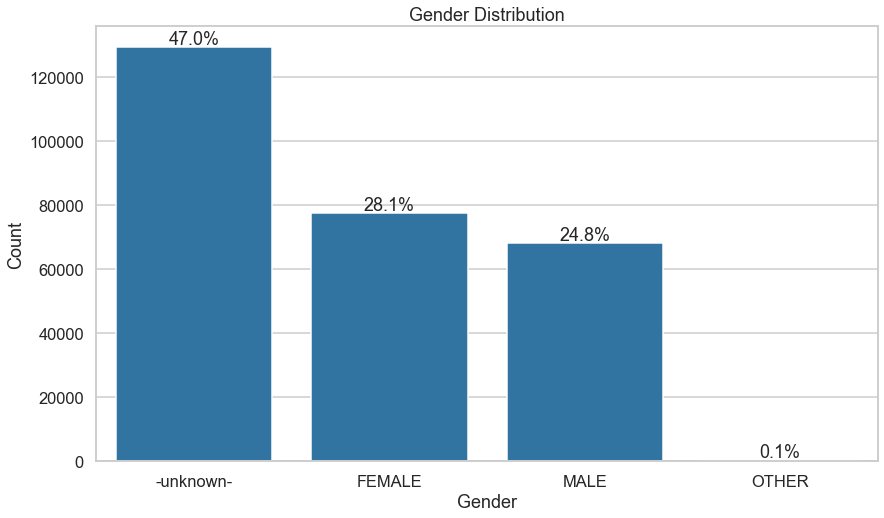

In [77]:
plt.figure(figsize=(14,8))
order1 = df_all['gender'].value_counts().index
sns.countplot(data = df_all, x = 'gender', order = order1, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = df_all['gender'].value_counts()

for idx in range(order2.shape[0]):
    
    count = order2[idx]
    getstr = '{:0.1f}%'.format(100*count/df_all.shape[0])
    plt.text(idx,count+1000,getstr,ha= 'center')

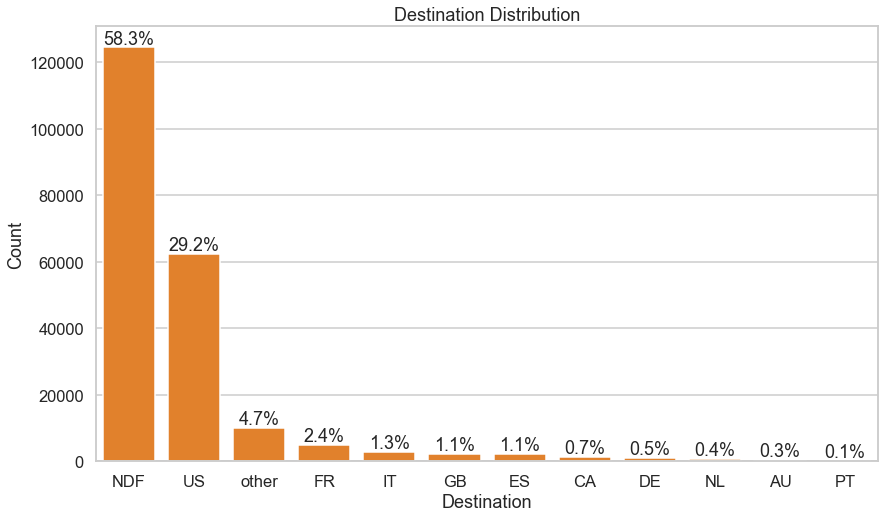

In [79]:
plt.figure(figsize=(14,8))
order1 = df_train['country_destination'].value_counts().index
sns.countplot(data = df_train, x = 'country_destination', order = order1, color = sns.color_palette()[1])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = df_train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    getstr='{:0.1f}%'.format(100*count / df_train.shape[0])
    plt.text(i,count+1000,getstr,ha='center')